## Trabalho 2 da disciplina de Processamento Digital de Imagens - 2023/1
Aluna: Leticia Bossatto Marchezi

RA: 791003

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Função geral

Função Convolution2D que recebe a imagem de input, uma função que deve gerar o kernel a ser aplicado e argumentos para o kernel.

Retorna o array 2D da imagem final.

In [2]:
def convolution2D(image_array: np.ndarray, kernel: callable, **kwargs) -> np.ndarray:
    created_kernel = kernel(**kwargs)

    image_height, image_width = image_array.shape
    kernel_height, kernel_width = created_kernel.shape

    # Criação de imagem de output
    output = np.zeros_like(image_array)

    # Criar padding para a convolucao
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Insere padding adding na imagem com os valores das bordas
    padded_image = np.pad(
        image_array, ((pad_height, pad_height), (pad_width, pad_width)), mode="edge"
    )

    # Aplica o kernel para cada pixel
    for row in range(image_height):
        for column in range(image_width):
            ## Seleciona a janela de acordo com o tamanho do kernel e soma o produto entre as matrizes 
            output[row, column] = np.sum(
                padded_image[row : row + kernel_height, column : column + kernel_width] * created_kernel
            )

    return output

## Criação de kernel

Função mean_kernel retorna um kernel de tamanho variável. Todos os elementos são da forma 1/(tamanho_kernel)^2

In [3]:
def mean_kernel(kernel_size: int):
    kernel = np.ones((kernel_size,kernel_size))/kernel_size**2
    
    return kernel

Função gaussian_kernel retorna o kernel da gaussiana com tamanho e sigma variáveis 

In [4]:
def gaussian_kernel(kernel_size: int, sigma: float):
    # Fórmula da gaussiana 2D
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2))
        * np.exp(-((x) ** 2 + (y) ** 2) / (2 * sigma**2)),
        (kernel_size, kernel_size),
    )

    # Normaliza o kernel
    kernel /= np.sum(kernel)

    return kernel

Função laplacian_kernel retorna um kernel para filtro laplaciano 3x3 normalizado

In [5]:
def laplacian_kernel():
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    return kernel

Função log_kernel_mask cria a máscara 7x7 a ser aplicada no filtro Laplaciano da Gaussiana. A máscara está normalizada.

In [6]:
def log_kernel_mask():
    return np.array([[0, 0, 1, 1, 1, 0, 0],
                             [0, 1, 3, 3, 3, 1, 0],
                             [1, 3, 0, -7, 0, 3, 1],
                             [1, 3, -7, -24, -7, 3, 1],
                             [1, 3, 0, -7, 0, 3, 1],
                             [0, 1, 3, 3, 3, 1, 0],
                             [0, 0, 1, 1, 1, 0, 0]])

Função log_kernel retorna o kernel de convolução entre o filtro da gaussiana pela máscara do LoG

In [7]:
def log_kernel(kernel_size: int, sigma: float):
    gaussian = gaussian_kernel(kernel_size, sigma)

    kernel = convolution2D(gaussian, log_kernel_mask)

    return kernel

Função para visualização do resultado de todas as filtragens

In [8]:
def display_filtered_images(images, titles):
    # Quantidade de imagens a ser mostrada
    num_filters = len(images)

    fig, axes = plt.subplots(1, num_filters, figsize=(5*num_filters, 5))

    # Mostra todas as imagens
    for i in range(num_filters):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    
    plt.tight_layout()

    plt.show()

## Resultados
Processa a imagem com os seguintes filtros:

Filtro da média 5x5

Filtro Gaussiano 5x4 com sigma = 40.0

Filtro Laplaciano 3x3

Filtro Laplaciano da Gaussiana 7x7

In [9]:
lena_image = Image.open("lena_gray.bmp")

image_array = np.array(lena_image)

mean_filtered_array = convolution2D(image_array, mean_kernel, kernel_size=5)
gaussian_filtered_array = convolution2D(image_array, gaussian_kernel, kernel_size=5, sigma=40.0)
laplacian_filtered_array = convolution2D(image_array, laplacian_kernel)
log_filtered_array = convolution2D(image_array, log_kernel, kernel_size=7, sigma=10.0)

mean_filtered_image = Image.fromarray(mean_filtered_array)
gaussian_filtered_image = Image.fromarray(gaussian_filtered_array)
laplacian_filtered_image = Image.fromarray(laplacian_filtered_array)
log_filtered_image = Image.fromarray(log_filtered_array)

Plota a imagem original e todas as imagens finais

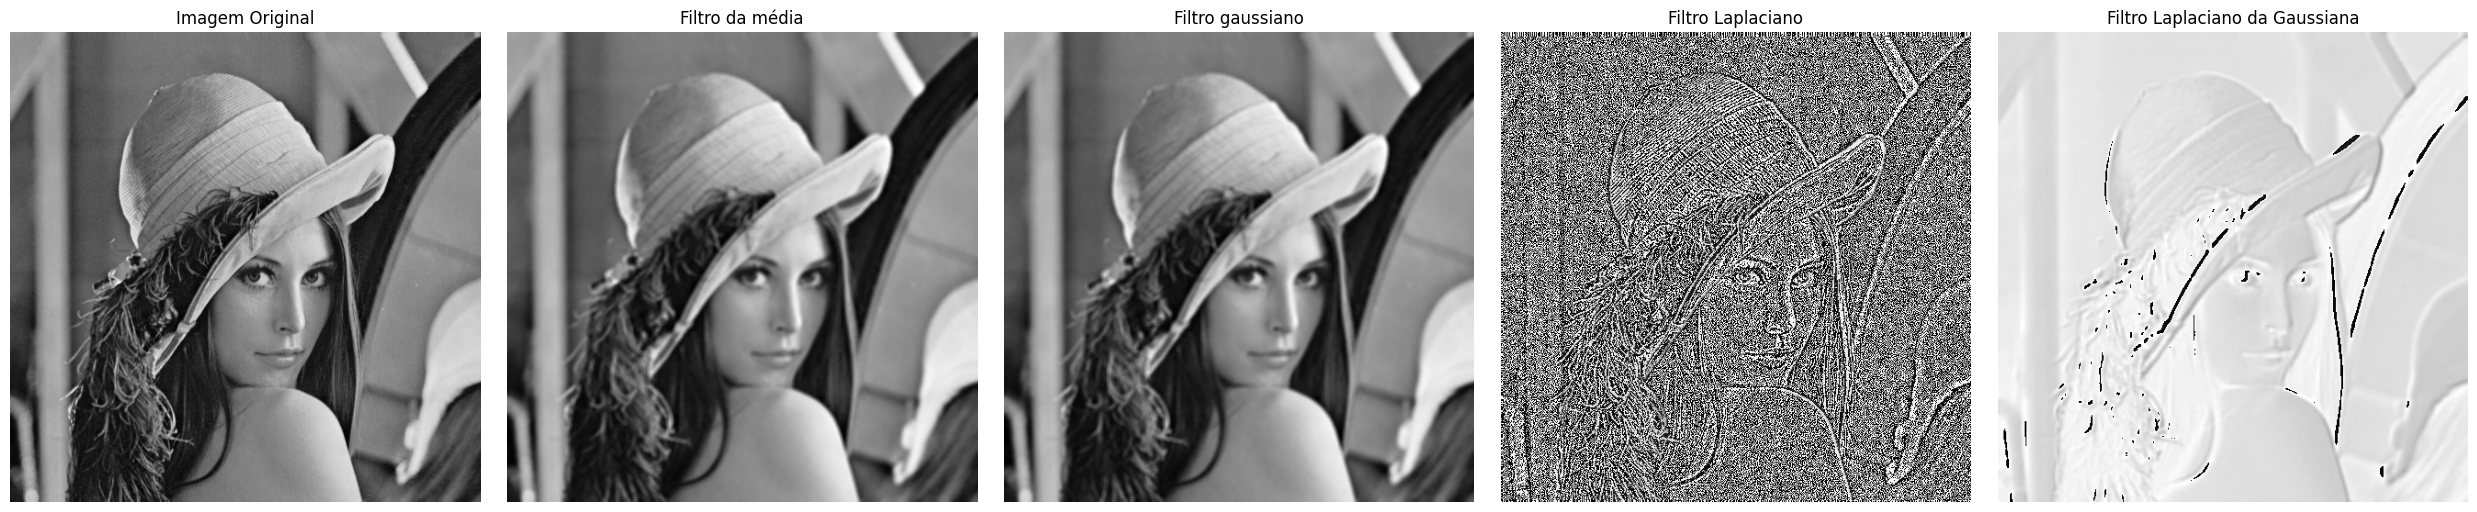

In [10]:
images = [image_array, mean_filtered_image, gaussian_filtered_image, laplacian_filtered_image, log_filtered_image]
titles = ["Imagem Original","Filtro da média", "Filtro gaussiano", "Filtro Laplaciano", "Filtro Laplaciano da Gaussiana"]


display_filtered_images(images, titles)